In [49]:

import collections
import pydotplus
import sklearn.preprocessing
import sklearn.ensemble
import sklearn.metrics
import sklearn.utils
import sklearn.decomposition
import sklearn.tree
import sklearn.svm
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns


In [2]:
import pandas as pd
import numpy as np
import sklearn.model_selection
import sklearn.linear_model

nuclei = pd.read_csv('data.csv')

In [3]:
len(nuclei.columns)

33

In [4]:
nuclei = nuclei.drop(nuclei.columns[32], axis=1)

In [5]:
nuclei.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
y = nuclei.diagnosis
X = nuclei.loc[:,nuclei.columns[2:]]

In [7]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=0.2)

In [8]:
logit_clf = sklearn.linear_model.LogisticRegression().fit(X_train, y_train)
logit_clf.score(X_train, y_train)

/Users/brendan.gilroy/anaconda3/envs/learn-env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9604395604395605

In [9]:
logit_clf.score(X_test, y_test)

0.9298245614035088

In [10]:
rf_clf = sklearn.ensemble.RandomForestClassifier()

In [11]:
rf_clf.fit(X_train, y_train)
importances = rf_clf.feature_importances_

/Users/brendan.gilroy/anaconda3/envs/learn-env/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [12]:
for idx, importance_score in enumerate(importances):
    if importance_score > .1:
        print(X_train.columns[idx]) 

concave points_mean
radius_worst
area_worst


In [13]:
print(rf_clf.score(X_train, y_train))
print(rf_clf.score(X_test, y_test))

1.0
0.956140350877193


In [14]:
y_pred = rf_clf.predict(X_test)
sklearn.metrics.confusion_matrix(y_test, y_pred)

array([[68,  0],
       [ 5, 41]])

Confusion matrix, without normalization
[[68  0]
 [ 5 41]]


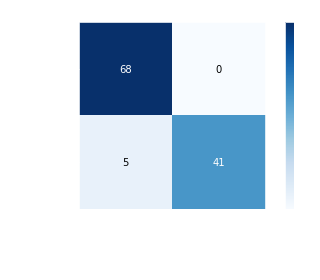

In [15]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[sklearn.utils.multiclass.unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=['benign', 'malignant'],
                      title='Confusion matrix, without normalization')

In [17]:
rf_probs = rf_clf.predict_proba(X_test)[:,1]
sklearn.metrics.roc_auc_score(y_test, rf_probs)

0.9693094629156012

AUC: 0.9693094629156012


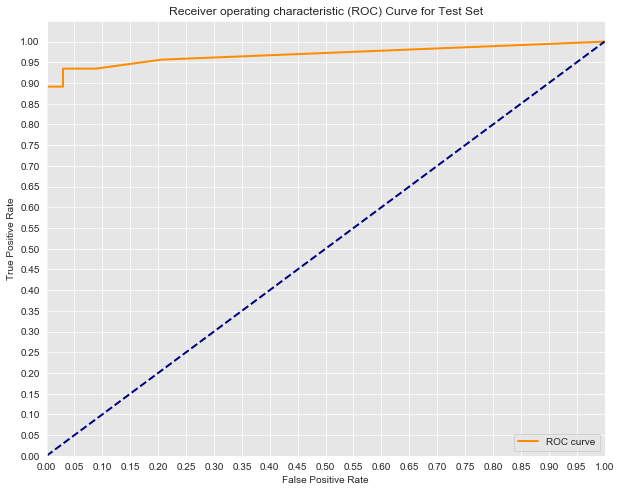

In [20]:
from sklearn.metrics import roc_curve, auc
import sys
#https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76
test_labels = list(map( lambda x: 0 if x == 'B' else 1, y_test))

fpr, tpr, thresholds = roc_curve(test_labels, rf_probs, pos_label=1)
#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set')
plt.legend(loc="lower right")
print('AUC: {}'.format(auc(fpr, tpr)))
plt.show()

In [116]:
pca = sklearn.decomposition.PCA(n_components='mle')
pca.fit(X_train)
X_train_xformed = pca.transform(X_train)

In [35]:
pca.components_[0]

array([ 5.08e-03,  2.26e-03,  3.51e-02,  5.16e-01,  3.87e-06,  4.10e-05,
        8.07e-05,  4.75e-05,  6.52e-06, -2.68e-06,  2.87e-04, -7.37e-05,
        2.04e-03,  5.16e-02, -8.57e-07,  5.61e-06,  8.51e-06,  3.16e-06,
       -1.57e-06, -1.23e-07,  7.15e-03,  3.13e-03,  4.95e-02,  8.53e-01,
        6.44e-06,  1.04e-04,  1.69e-04,  7.43e-05,  1.84e-05,  1.69e-06])

In [32]:
for idx, component in enumerate(pca.components_[0].tolist()):
    if component > .1:
        print(X_train.columns[idx])

area_mean
area_worst


In [48]:
dtree = sklearn.tree.DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree.score(X_test, y_test)

0.956140350877193

In [66]:
svc = sklearn.svm.SVC(C=, gamma='scale')
svc.fit(X_train, y_train)


SVC(C=100000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [67]:
svc.score(X_test, y_test)

0.956140350877193

In [69]:
#https://towardsdatascience.com/fine-tuning-a-classifier-in-scikit-learn-66e048c21e65
lb = sklearn.preprocessing.LabelBinarizer()
targets = lb.fit_transform(y.values)

X_train2, X_test2, y_train2, y_test2 = sklearn.model_selection.train_test_split(
    X, targets, stratify=targets)

In [76]:
print(y_train.value_counts(normalize=True))
print(pd.DataFrame(y_train2)[0].value_counts(normalize=True))

B    0.635165
M    0.364835
Name: diagnosis, dtype: float64
0    0.626761
1    0.373239
Name: 0, dtype: float64


In [84]:
param_grid = {
    'min_samples_split': [3, 5, 10], 
    'n_estimators' : [100, 300],
    'max_depth': [3, 5, 15, 25],
    'max_features': [3, 5, 10, 20]
}

skf = sklearn.model_selection.StratifiedKFold(n_splits=10)
recall_scorer = sklearn.metrics.make_scorer(sklearn.metrics.recall_score)
grid_search = sklearn.model_selection.GridSearchCV(rf_clf, param_grid, scoring=recall_scorer,
                                                   cv=skf, return_train_score=True, n_jobs=-1)
grid_search.fit(X_train2, y_train2)

/Users/brendan.gilroy/anaconda3/envs/learn-env/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/brendan.gilroy/anaconda3/envs/learn-env/lib/python3.7/site-packages/sklearn/model_selection/_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
           

In [88]:
results = pd.DataFrame(grid_search.cv_results_)
results = results.sort_values(by='mean_test_score', ascending=False)
results[['mean_test_score', 'param_max_depth', 'param_max_features', 'param_min_samples_split', 'param_n_estimators']].round(3).head()

,mean_test_score,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators
48,0.937,15,3,3,100
90,0.937,25,20,3,100
78,0.931,25,5,3,100
72,0.931,25,3,3,100
38,0.931,5,10,5,100


In [96]:
#again
#https://towardsdatascience.com/fine-tuning-a-classifier-in-scikit-learn-66e048c21e65
def adjusted_classes(y_scores2, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores2]

def precision_recall_threshold(p, r, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores2, t)
    print(pd.DataFrame(sklearn.metrics.confusion_matrix(y_test2, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    # plot the curve
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(r, p, color='b', alpha=0.2,
             where='post')
    plt.fill_between(r, p, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0.5, 1.01]);
    plt.xlim([0.5, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(r[close_default_clf], p[close_default_clf], '^', c='k',
            markersize=15)
    
y_scores2 = grid_search.predict_proba(X_test2)[:, 1]

p, r, thresholds = sklearn.metrics.precision_recall_curve(y_test2, y_scores2)

     pred_neg  pred_pos
neg        88         2
pos         0        53


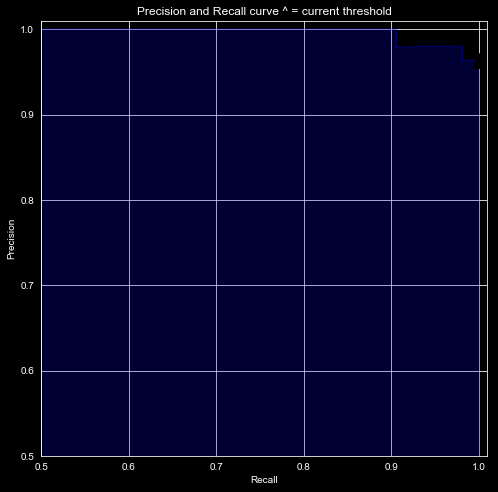

In [102]:
precision_recall_threshold(p, r, thresholds, 0.41)

In [104]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

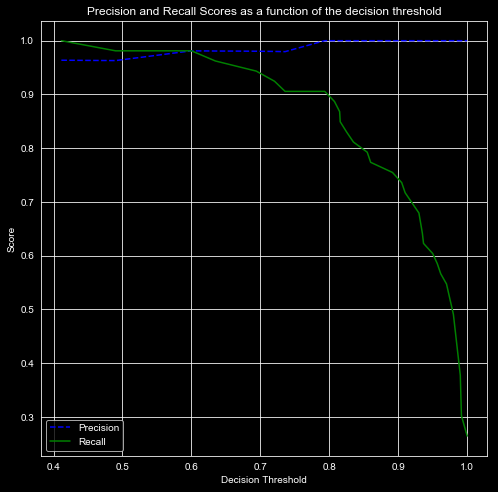

In [105]:
plot_precision_recall_vs_threshold(p, r, thresholds)

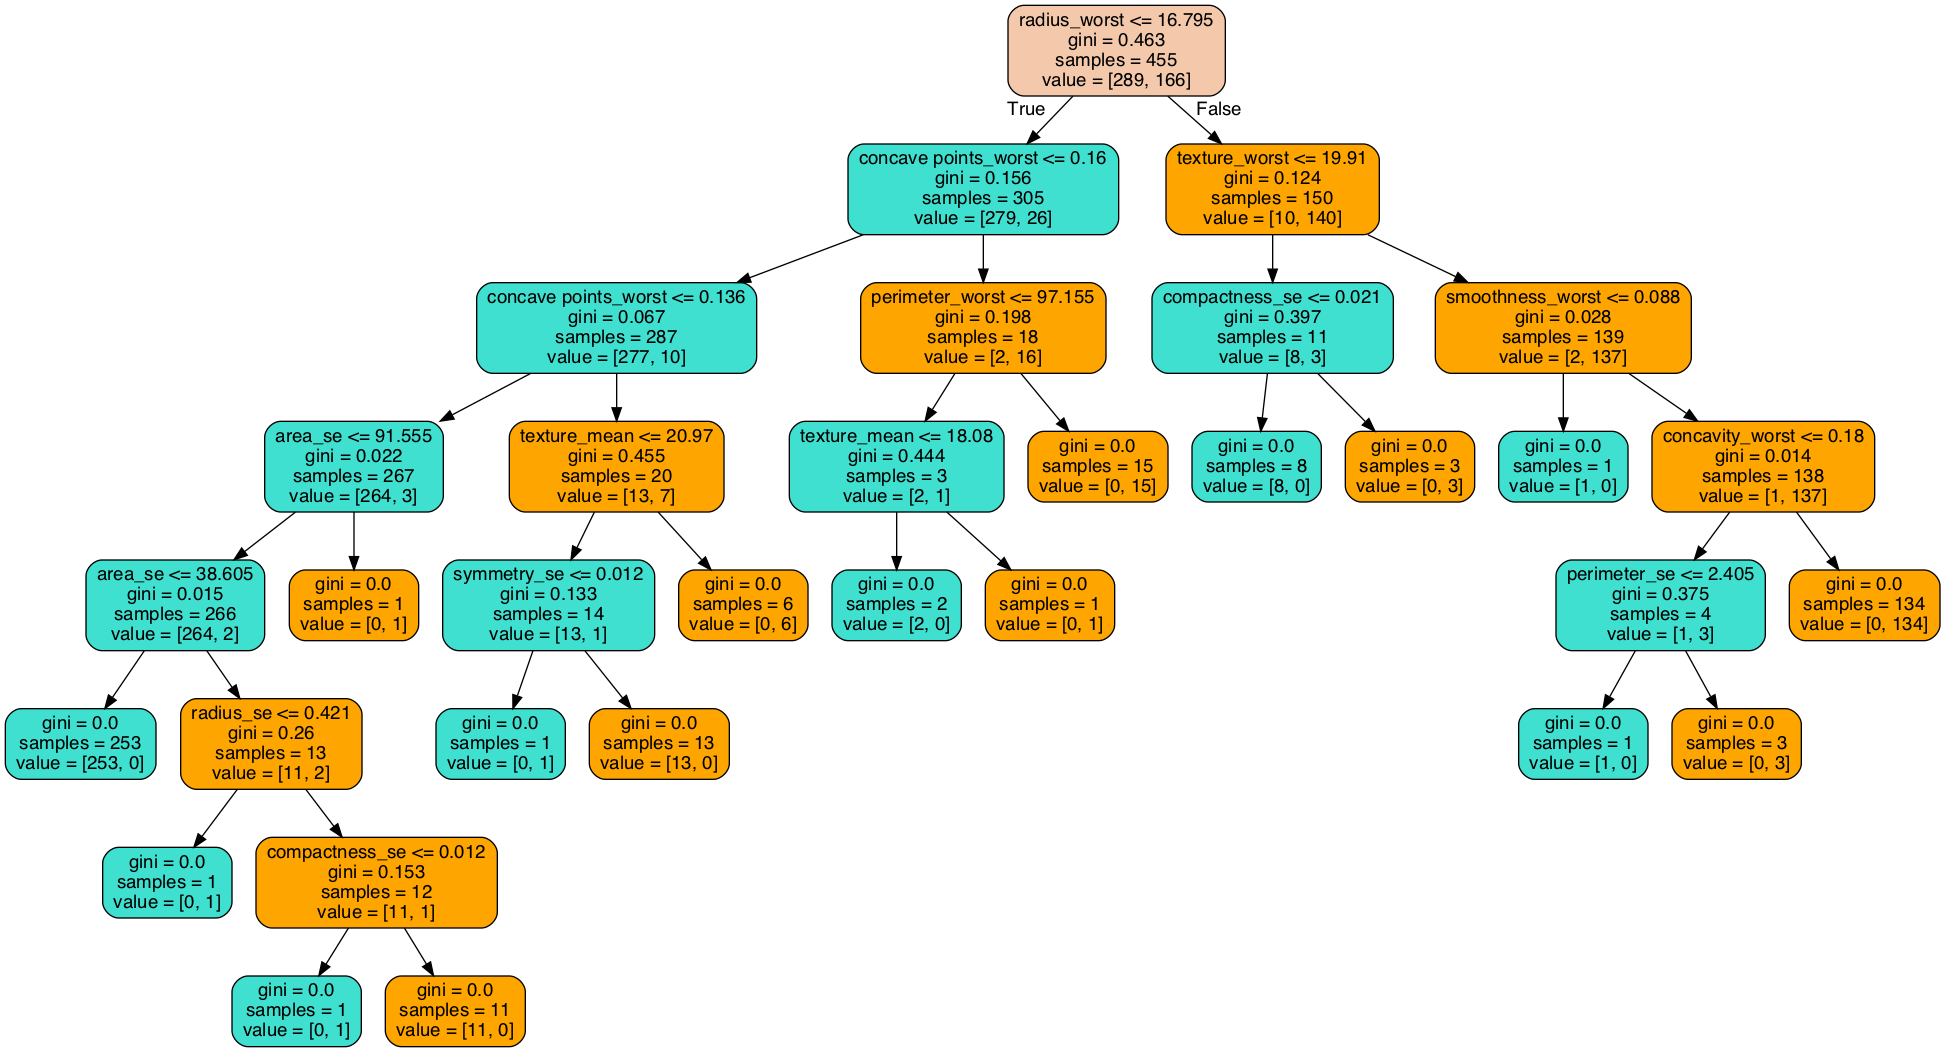

In [109]:
dot_data = sklearn.tree.export_graphviz(dtree,
                                feature_names=X_train.columns,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
  
from IPython.display import Image   
Image(graph.create_png())

In [112]:
nuclei_standard_scaled = nuclei[[column for column in nuclei.columns if column.endswith('se') ]]

In [113]:
X_train3, X_test3, y_train3, y_test3 = sklearn.model_selection.train_test_split(
    nuclei_standard_scaled, targets, stratify=targets)

In [117]:
pca2 = sklearn.decomposition.PCA(n_components='mle')
pca2.fit(X_train3)
X_train3_xformed = pca2.transform(X_train3)

In [120]:
for idx, component in enumerate(pca2.components_[0].tolist()):
    if component > .01:
        print(X_train3.columns[idx])

perimeter_se
area_se


In [119]:
pca2.components_[0]

array([5.60e-03, 6.62e-04, 4.05e-02, 9.99e-01, 2.81e-06, 8.60e-05,
       1.47e-04, 4.92e-05, 1.43e-05, 5.24e-06])

In [121]:
X4 = nuclei['area_se']

In [134]:
X_train4, X_test4, y_train4, y_test4 = sklearn.model_selection.train_test_split(
    X4, targets, stratify=targets)
X_train4, X_test4, y_train4, y_test4 = X_train4.values.reshape(-1,1), \
    X_test4.values.reshape(-1,1),\
    y_train4.ravel(),\
    y_test4.ravel()

In [136]:
svc = sklearn.svm.SVC(C=1000000, gamma='scale')
svc.fit(X_train4, y_train4)
svc.score(X_test4, y_test4)

0.8531468531468531

In [137]:
logit_clf = sklearn.linear_model.LogisticRegression().fit(X_train4, y_train4)
logit_clf.score(X_test4, y_test4)

/Users/brendan.gilroy/anaconda3/envs/learn-env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8531468531468531

In [142]:
print(nuclei[nuclei['diagnosis'] == 'M']['area_se'].min())
nuclei[nuclei['diagnosis'] == 'B']['area_se'].sort_values(ascending=False)

13.99


290    77.110
191    53.650
491    50.950
152    49.850
421    49.450
275    48.840
225    48.290
157    46.610
471    44.960
528    44.740
424    43.520
89     42.760
407    41.240
243    39.930
128    39.840
147    39.430
160    38.340
281    37.830
513    37.110
92     36.350
473    35.130
500    34.840
150    34.780
288    34.680
60     34.620
518    34.370
136    34.370
90     33.760
363    33.580
309    33.010
        ...  
403    11.360
175    11.360
378    11.350
310    11.280
459    11.280
296    11.090
342    10.800
270    10.770
120    10.500
151    10.210
534    10.090
303    10.080
101     9.833
307     9.789
428     9.704
474     9.597
382     9.549
313     9.438
522     9.332
107     9.227
241     9.006
114     8.966
527     8.955
231     8.605
59      8.322
46      8.205
547     7.326
525     7.254
376     7.228
412     6.802
Name: area_se, Length: 357, dtype: float64

In [143]:
X5 = nuclei['radius_worst']

In [144]:
X_train5, X_test5, y_train5, y_test5 = sklearn.model_selection.train_test_split(
    X5, targets, stratify=targets)
X_train5, X_test5, y_train5, y_test5 = X_train5.values.reshape(-1,1), \
    X_test5.values.reshape(-1,1),\
    y_train5.ravel(),\
    y_test5.ravel()

In [145]:
logit_clf = sklearn.linear_model.LogisticRegression().fit(X_train5, y_train5)
logit_clf.score(X_test5, y_test5)

/Users/brendan.gilroy/anaconda3/envs/learn-env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9230769230769231

In [146]:
print(nuclei[nuclei['diagnosis'] == 'M']['radius_worst'].min())
nuclei[nuclei['diagnosis'] == 'B']['radius_worst'].sort_values(ascending=False)

12.84


491    19.820
157    18.220
363    18.130
406    17.710
133    17.500
209    17.380
508    17.320
347    17.270
472    17.180
484    17.010
375    16.970
225    16.770
513    16.760
500    16.760
413    16.760
340    16.670
542    16.510
311    16.460
486    16.460
421    16.460
476    16.450
447    16.430
481    16.410
227    16.410
92     16.360
89     16.340
434    16.310
448    16.300
147    16.250
291    16.250
        ...  
520    10.570
234    10.510
557    10.490
206    10.420
66     10.410
68     10.310
504    10.280
21     10.230
391    10.170
318    10.060
63     10.010
358     9.981
192     9.968
412     9.965
553     9.845
71      9.733
307     9.699
114     9.628
61      9.565
59      9.507
525     9.473
568     9.456
116     9.414
175     9.262
151     9.092
538     9.077
46      8.964
314     8.952
539     8.678
101     7.930
Name: radius_worst, Length: 357, dtype: float64

In [148]:
print(nuclei[nuclei['diagnosis'] == 'M']['concave points_mean'].min())
nuclei[nuclei['diagnosis'] == 'B']['concave points_mean'].sort_values(ascending=False)

0.020309999999999998


128    0.085340
152    0.078570
112    0.077980
275    0.074040
89     0.070640
505    0.070380
81     0.069870
528    0.066150
290    0.066020
76     0.065560
453    0.064950
421    0.063000
484    0.062110
500    0.061420
111    0.060210
376    0.059410
133    0.059330
123    0.057780
356    0.056030
288    0.055880
469    0.055640
380    0.055500
148    0.055320
375    0.053970
396    0.053810
518    0.053030
482    0.052660
504    0.052520
208    0.051020
496    0.050740
         ...   
522    0.005664
327    0.005592
546    0.005495
360    0.005449
425    0.005159
412    0.005128
316    0.005051
308    0.004419
58     0.004167
307    0.003472
276    0.003333
306    0.003261
231    0.003125
333    0.002941
285    0.002924
185    0.002404
178    0.001852
538    0.000000
473    0.000000
550    0.000000
557    0.000000
140    0.000000
391    0.000000
561    0.000000
101    0.000000
314    0.000000
192    0.000000
175    0.000000
174    0.000000
568    0.000000
Name: concave points_mea

In [156]:
nuclei[(nuclei['diagnosis'] == 'M') & (nuclei['concave points_mean'] > .02029) & (nuclei['radius_worst'] > 12.84)].count()

id                         211
diagnosis                  211
radius_mean                211
texture_mean               211
perimeter_mean             211
area_mean                  211
smoothness_mean            211
compactness_mean           211
concavity_mean             211
concave points_mean        211
symmetry_mean              211
fractal_dimension_mean     211
radius_se                  211
texture_se                 211
perimeter_se               211
area_se                    211
smoothness_se              211
compactness_se             211
concavity_se               211
concave points_se          211
symmetry_se                211
fractal_dimension_se       211
radius_worst               211
texture_worst              211
perimeter_worst            211
area_worst                 211
smoothness_worst           211
compactness_worst          211
concavity_worst            211
concave points_worst       211
symmetry_worst             211
fractal_dimension_worst    211
dtype: i